In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ivac

# Linear IVAC 

In [2]:
lvac = ivac.LinearIVAC(
    minlag=1, maxlag=1000, nevecs=10, reweight=False, adjust=True, method="fft"
)

## Feature 2
(only salt bridges)
3.8.21

In [3]:
with np.load("../data/feat3_raw.npz", allow_pickle=True) as f:
    feat3_trajs = f["arr_0"]

In [4]:
feat3_trajs = list(feat3_trajs)
print(len(feat3_trajs))
print(feat3_trajs[0].shape)

1295
(3000, 60)


In [5]:
lvac.fit(feat3_trajs)

### Implied timescales

(0.0, 10000.0)

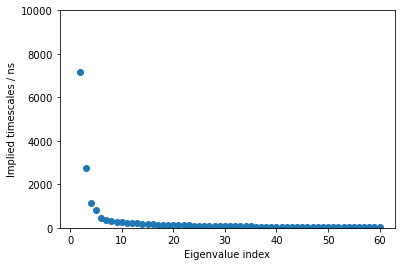

In [14]:
plt.scatter(np.arange(1, 61), lvac.its * 0.1)  # in units of ns
plt.ylabel("Implied timescales / ns")
plt.xlabel("Eigenvalue index")
plt.ylim([0, 10000])

In [13]:
lvac.its[1]

71719.16569390733

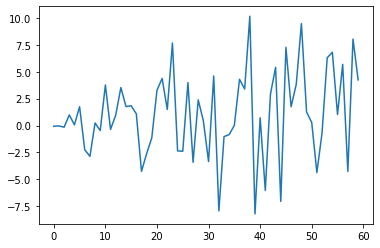

In [17]:
# plot 2nd eigenvector (first non-constant)
plt.plot(lvac.evecs[1])

In [2]:
import pickle

In [33]:
with open("../data/livac-feat2.pkl", mode="wb") as f:
    pickle.dump(lvac, f)

In [3]:
with open("../data/livac-feat2.pkl", mode="rb") as f:
    lvac = pickle.load(f)

NOTE (3.12.21) changed name of feat3 pickle file to feat2 since the naming was incorrect

(0.0, 10000.0)

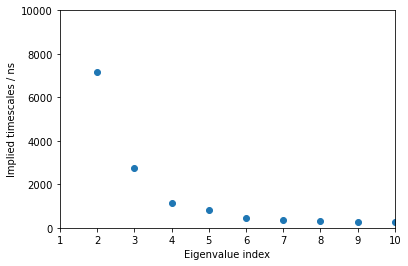

In [10]:
plt.scatter(np.arange(1, 11), lvac.its[:10] * 0.1)  # in units of ns
plt.ylabel("Implied timescales / ns")
plt.xlabel("Eigenvalue index")
plt.xlim([1, 10])
plt.ylim([0, 10000])

## Feature 3 (salt bridges + torsions)
3.12.21

In [11]:
with np.load("../data/feat3_raw.npz", allow_pickle=True) as f:
    feat3_trajs = f["arr_0"]

In [12]:
feat3_trajs = list(feat3_trajs)
print(len(feat3_trajs))
print(feat3_trajs[0].shape)

1295
(3000, 130)


In [13]:
lvac3 = ivac.LinearIVAC(
    minlag=1, maxlag=1000, nevecs=10, reweight=False, adjust=True, method="fft"
)

In [14]:
lvac3.fit(feat3_trajs)

In [35]:
with open("../data/livac-feat3.pkl", mode="wb") as f:
    pickle.dump(lvac3, f)

(0.0, 10000.0)

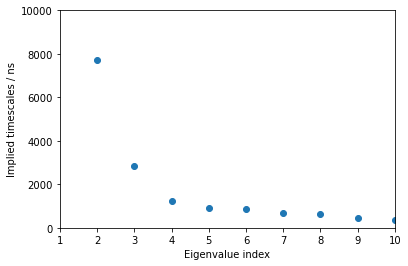

In [16]:
plt.scatter(np.arange(1, 11), lvac3.its[:10] * 0.1)  # in units of ns
plt.ylabel("Implied timescales / ns")
plt.xlabel("Eigenvalue index")
plt.xlim([1, 10])
plt.ylim([0, 10000])

Almost identical to the other features

# Cluster in IVAC eigenvector features (10 dimensions) 

In [18]:
import pyemma

## Feature 2

In [27]:
with np.load("../data/feat2_raw.npz", allow_pickle=True) as f:
    feat2_trajs = f["arr_0"]

In [28]:
livac_trajs2 = lvac.transform(feat2_trajs)

In [29]:
km2 = pyemma.coordinates.cluster_mini_batch_kmeans(data=livac_trajs2, k=200)

12-03-21 19:15:50 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[2] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [30]:
dtrajs = km2.dtrajs

In [31]:
with open("../data/kmeans_feat2_200", mode="w+"):
    km3.save("../data/kmeans_feat2_200")

In [32]:
dtrajs[0].shape

(3000,)

## Feature 3

200 clusters

In [17]:
livac_trajs3 = lvac3.transform(feat3_trajs)

In [19]:
km3 = pyemma.coordinates.cluster_mini_batch_kmeans(data=livac_trajs3, k=200)

12-03-21 16:19:34 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[0] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [21]:
with open("../data/kmeans_feat3_200", mode="w+"):
    km3.save("../data/kmeans_feat3_200")

In [22]:
km3.dtrajs.shape

AttributeError: 'list' object has no attribute 'shape'

In [23]:
len(km3.dtrajs)

1295

In [24]:
with open("../data/kmeans_feat3_200", mode="w+"):
    km3.save("../data/kmeans_feat3_200")

In [25]:
km3.dtrajs[0].shape

(3000,)

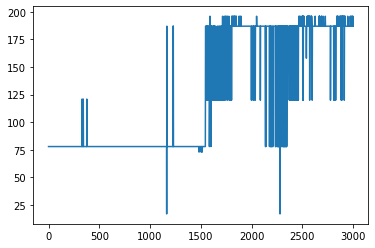

In [36]:
plt.plot(km3.dtrajs[0])

In [ ]:
plt.plot